In [3]:
import missingno as msno
from tqdm.notebook import tqdm

In [2]:
og_raw_data = pd.read_csv('./bookcontents2.csv',error_bad_lines=False)

b'Skipping line 16: expected 6 fields, saw 10\nSkipping line 19: expected 6 fields, saw 10\nSkipping line 20: expected 6 fields, saw 9\nSkipping line 73: expected 6 fields, saw 14\nSkipping line 149: expected 6 fields, saw 11\nSkipping line 150: expected 6 fields, saw 10\nSkipping line 165: expected 6 fields, saw 16\nSkipping line 167: expected 6 fields, saw 23\nSkipping line 198: expected 6 fields, saw 13\nSkipping line 208: expected 6 fields, saw 48\nSkipping line 239: expected 6 fields, saw 11\nSkipping line 260: expected 6 fields, saw 12\nSkipping line 327: expected 6 fields, saw 14\nSkipping line 347: expected 6 fields, saw 14\nSkipping line 354: expected 6 fields, saw 26\nSkipping line 399: expected 6 fields, saw 9\nSkipping line 405: expected 6 fields, saw 7\nSkipping line 442: expected 6 fields, saw 28\nSkipping line 468: expected 6 fields, saw 16\nSkipping line 488: expected 6 fields, saw 30\nSkipping line 501: expected 6 fields, saw 34\nSkipping line 511: expected 6 fields, s

In [367]:
og_raw_data = pd.read_csv('./bookcontents3.csv',error_bad_lines=False)

b'Skipping line 6: expected 6 fields, saw 8\nSkipping line 14: expected 6 fields, saw 30\nSkipping line 24: expected 6 fields, saw 9\nSkipping line 64: expected 6 fields, saw 12\nSkipping line 69: expected 6 fields, saw 18\nSkipping line 71: expected 6 fields, saw 15\nSkipping line 149: expected 6 fields, saw 20\nSkipping line 177: expected 6 fields, saw 14\nSkipping line 194: expected 6 fields, saw 8\nSkipping line 227: expected 6 fields, saw 14\nSkipping line 236: expected 6 fields, saw 14\nSkipping line 239: expected 6 fields, saw 22\nSkipping line 244: expected 6 fields, saw 10\nSkipping line 262: expected 6 fields, saw 16\nSkipping line 295: expected 6 fields, saw 8\nSkipping line 298: expected 6 fields, saw 7\nSkipping line 312: expected 6 fields, saw 14\nSkipping line 356: expected 6 fields, saw 19\nSkipping line 368: expected 6 fields, saw 22\nSkipping line 560: expected 6 fields, saw 10\nSkipping line 622: expected 6 fields, saw 54\nSkipping line 643: expected 6 fields, saw 10

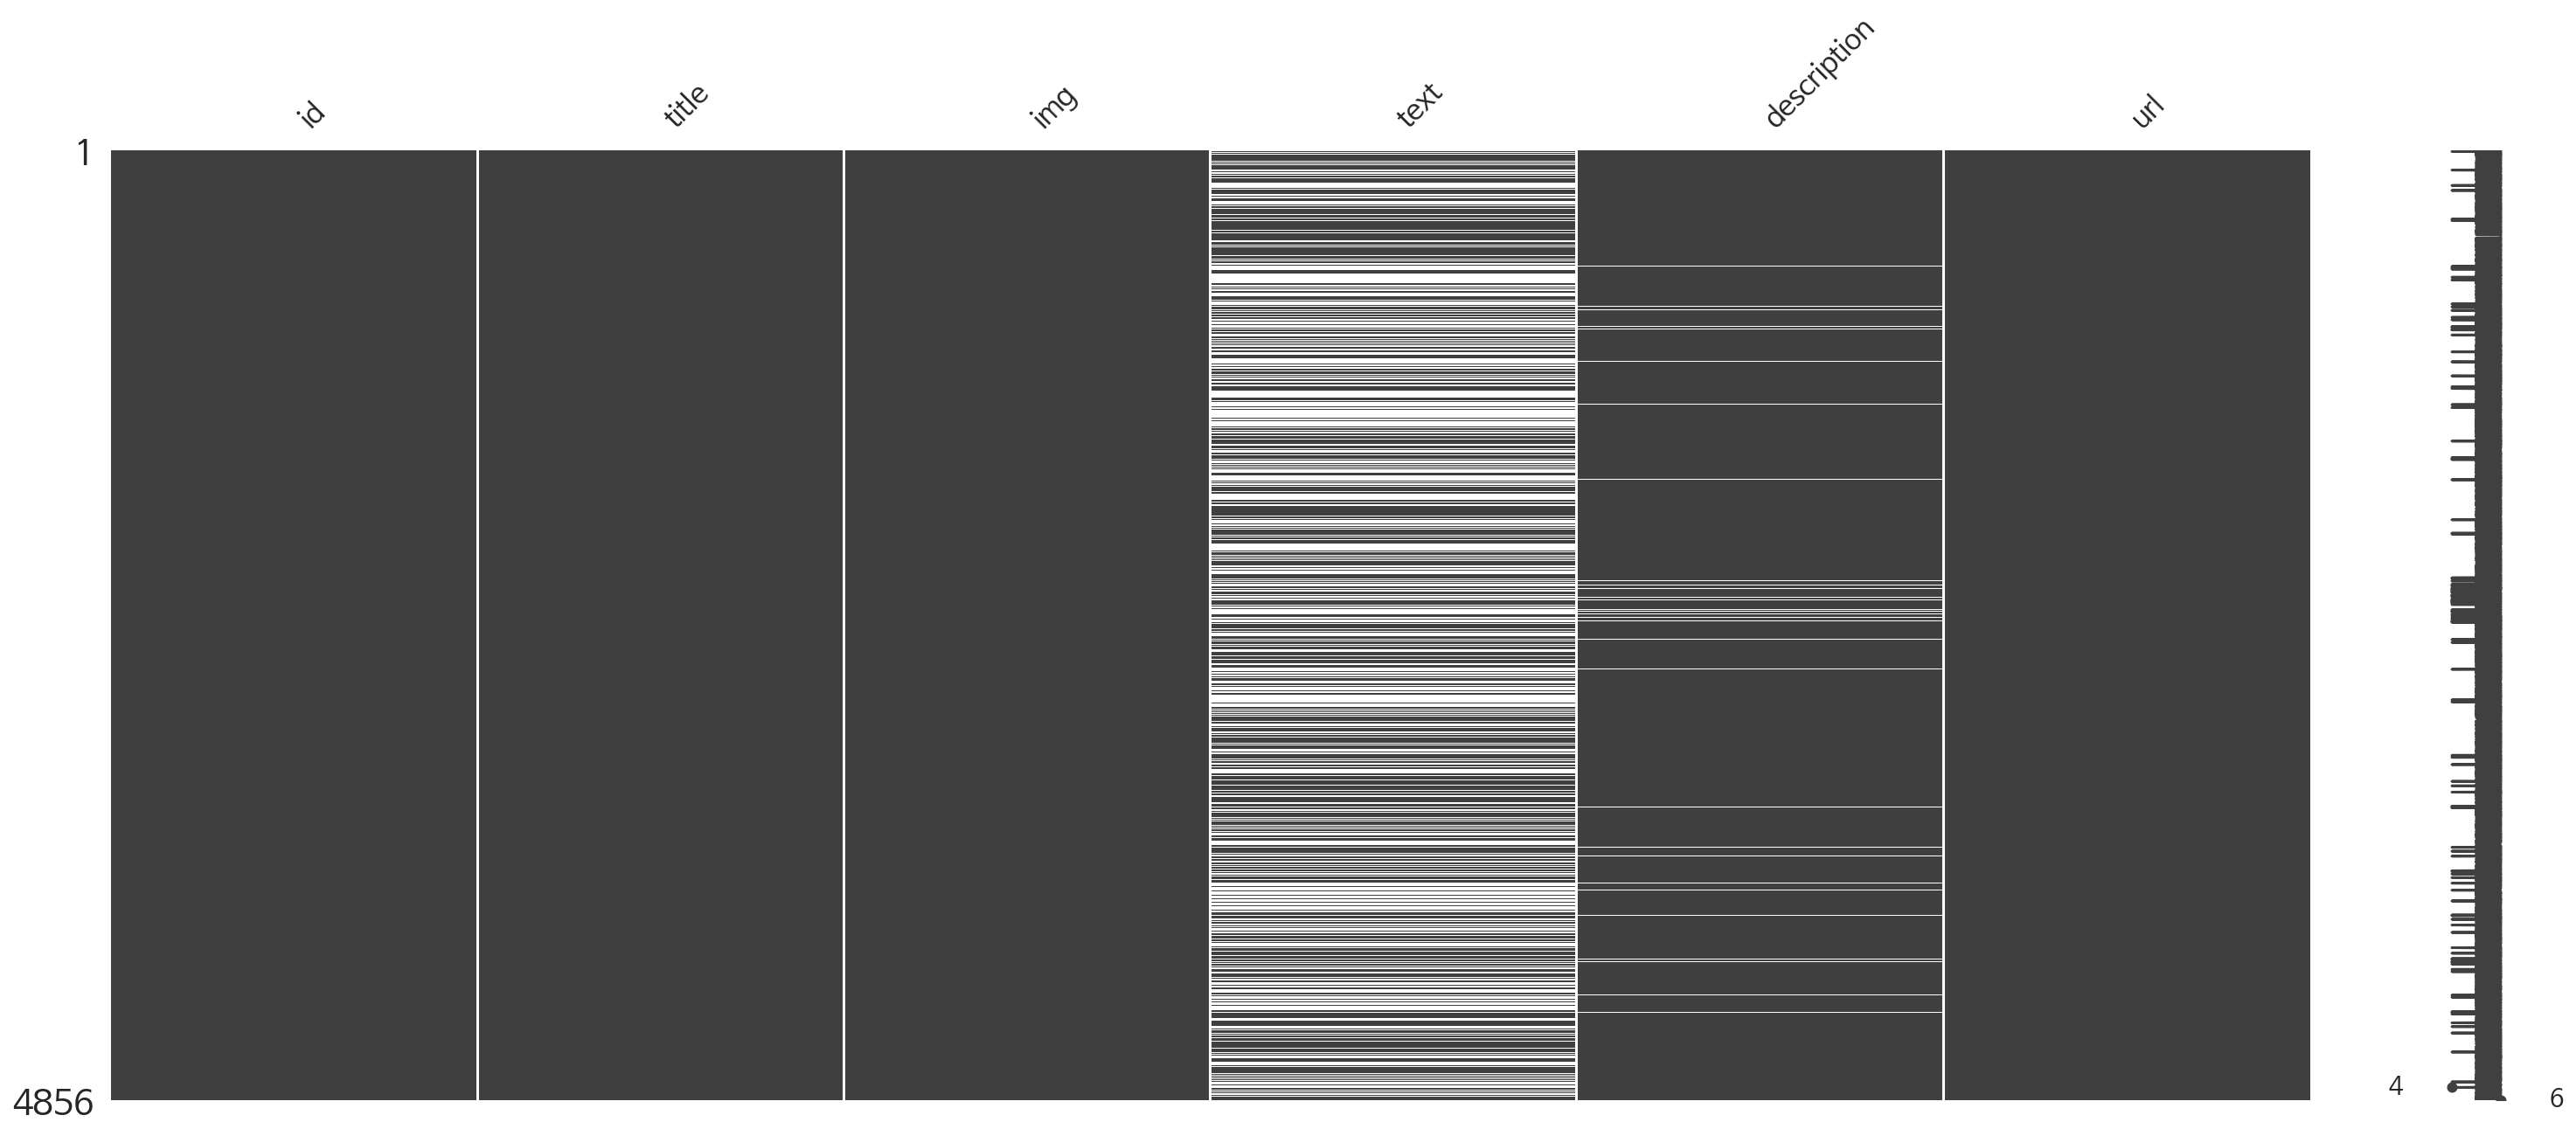

In [368]:
msno.matrix(og_raw_data)

In [369]:
og_raw_data = og_raw_data.drop_duplicates('title',keep='first')

## desctiption


In [370]:
desc_data = og_raw_data[['id','description','title']]

In [371]:
desc_data = desc_data.dropna(axis=0)
desc_data.shape

(4384, 3)

## text

In [372]:
text_data = og_raw_data[['id','text','title']]

In [373]:
text_data = text_data.dropna(axis=0)
text_data.shape

(2529, 3)

## desc + text

In [42]:
og_raw_data['text'] = og_raw_data['text'].fillna(' ')

In [43]:
og_raw_data['desc_text'] = og_raw_data['description'] + og_raw_data['text']

In [44]:
desc_text = og_raw_data.dropna(axis=0)
desc_text= desc_text.drop_duplicates('title',keep='first')

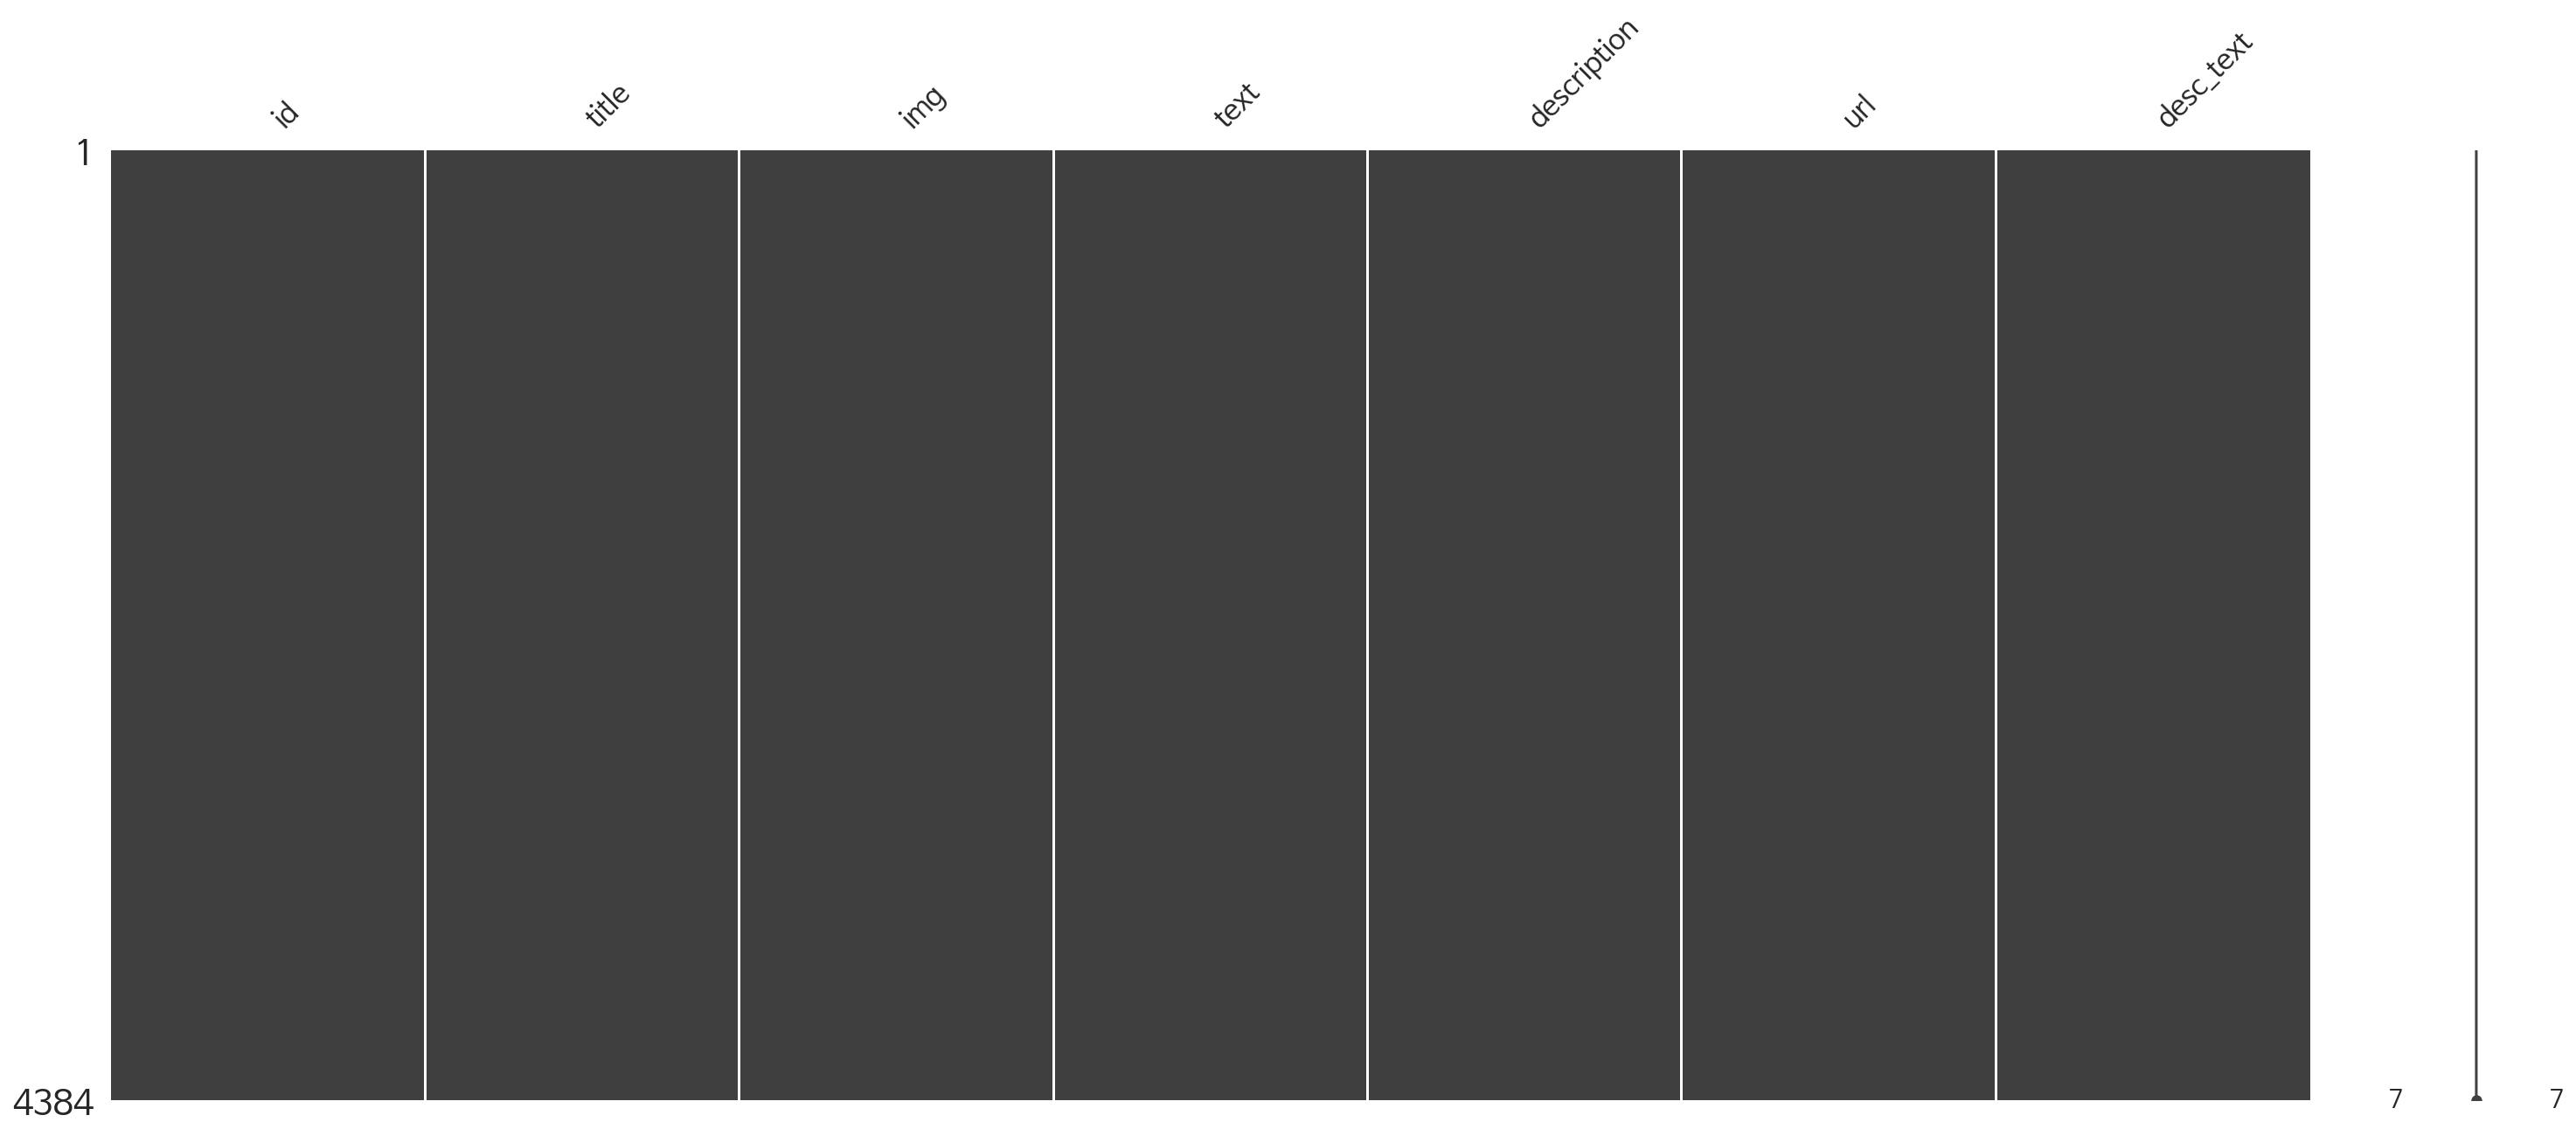

In [14]:
msno.matrix(desc_text)

## 형태소 분석

In [16]:
from konlpy.tag import *
# hannanum = Hannanum()
okt = Okt()

In [17]:
desc_data = [desc_data for desc_data in desc_data['description']]
desc_data = tqdm(desc_data)

desc_tokens = [okt.morphs(row) for row in desc_data]
len(desc_tokens)

4384

In [18]:
text_data = [text_data for text_data in text_data['text']]
text_data = tqdm(text_data)

text_tokens = [okt.morphs(row) for row in text_data]
len(text_tokens)

2529

In [19]:
desc_text_data = [desc_text_data for desc_text_data in desc_text['desc_text']]
desc_text_data = tqdm(desc_text_data)

text_contents_tokens = [okt.morphs(row) for row in desc_text_data]
len(text_contents_tokens)

4384

In [20]:
import pickle 
## Save pickle
with open("desc_tokens2.pickle","wb") as fw:
    pickle.dump(desc_tokens, fw)

In [21]:
import pickle 
## Save pickle
with open("text_tokens2.pickle","wb") as fw:
    pickle.dump(text_tokens, fw)

In [22]:
import pickle 
## Save pickle
with open("text_contents_tokens2.pickle","wb") as fw:
    pickle.dump(text_contents_tokens, fw)

In [25]:
import pickle 
## Load pickle
with open("desc_tokens.pickle","rb") as fr:
    desc_tokens = pickle.load(fr)
len(desc_tokens)
#['a', 'b', 'c']

8293

In [94]:
import pickle 
## Load pickle
with open("text_tokens2.pickle","rb") as fr:
    text_tokens = pickle.load(fr)
len(text_tokens)
#['a', 'b', 'c']

2529

## stop words 설정

In [23]:
with open('ko_stop_words.txt') as text:
    lines = text.readlines()

In [83]:
stop_words1 = ['.','(',')',',',"'",'%','-','X',').','.','---','p','"','']

In [84]:
stop_words2 = [ line.replace('\n','') for line in lines]

In [85]:
stop_words = stop_words1 + stop_words2

## 시리즈 형태로 바꿔서 apply 함수 적용

In [119]:
text_tokens_series = pd.Series(text_tokens)
text_tokens = text_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(text_tokens)

2529

In [121]:
desc_tokens_series = pd.Series(desc_tokens)
desc_tokens = desc_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(desc_tokens)

4384

In [434]:
text_contents_tokens_series = pd.Series(text_contents_tokens)
text_contents_tokens = text_contents_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(text_contents_tokens)

4384

## 띄워쓰기가 있는 문장으로 변환

In [452]:
contents_for_vectorize = []

for content in text_contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)
    
len(contents_for_vectorize)

4384

## CountVectorizer

In [436]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)

In [437]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4384x90152 sparse matrix of type '<class 'numpy.int64'>'
	with 1022351 stored elements in Compressed Sparse Row format>

## Tf-itf

In [453]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1, decode_error = 'ignore')

In [454]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4384x90152 sparse matrix of type '<class 'numpy.float64'>'
	with 1022351 stored elements in Compressed Sparse Row format>

In [455]:
num_samples, num_fetures = X.shape
num_samples, num_fetures

(4384, 90152)

## pairwise_distances 구하기

In [456]:
from sklearn.metrics import pairwise_distances

In [510]:
book_matrix = pairwise_distances(X,X,metric='cosine')

In [502]:
def title_idx(data,title):
    a = pd.DataFrame(np.argsort(book_matrix))[0].apply(lambda x : data.iloc[x])
    return a[a['title'] == title].index

In [503]:
og_raw_data[og_raw_data['title'] == '개미 (2)']

,id,title,img,text,description,url
3928,4138,개미 (2),http://image.yes24.com/momo/TopCate408/MidCate...,지하 40층. 많은 개미들이 움직이고 있다. 8월의 더위가 한창 기승을 부리고 있는...,프랑스의 천재 작가 베르나르 베르베르의 〈개미〉는 인간 세계와 개미 세계의 만남과 ...,https://www.yes24.com/Product/Goods/185464


In [507]:
title_idx(desc_text,'데미안')

Int64Index([1764], dtype='int64')

In [505]:
def check_book(data,idx):
    return og_raw_data[og_raw_data['id'] == data.iloc[idx][0]]

In [514]:
for i in np.argsort(book_matrix[1764])[:10]:
    result_df = check_book(desc_data,i)
    print(result_df[['id','title','url']])

        id title                                          url
1881  1983   데미안  https://www.yes24.com/Product/Goods/9019369
        id           title                                          url
4207  4446  데미안 (10주년 특별판)  https://www.yes24.com/Product/Goods/8416212
        id        title                                           url
4149  4381  미니북 초판본 데미안  https://www.yes24.com/Product/Goods/70904666
        id            title                                          url
4759  5044  제대로 된 시체답게 행동해!  https://www.yes24.com/Product/Goods/5533457
        id    title                                           url
1547  1630  천국보다 낯선  https://www.yes24.com/Product/Goods/11688092
        id title                                           url
4625  4896  방랑자들  https://www.yes24.com/Product/Goods/80128261
        id          title                                           url
4325  4580  전쟁과 평화 세트 한정판  https://www.yes24.com/Product/Goods/56942640
      id      title                         

## 테스트 문장 만들기

In [638]:
new_post = ['마음이 아프다']
new_post_tokens = [ okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 마음 이 아프다']

In [639]:
new_post_for_vectorize = [w for w in new_post_for_vectorize if w not in stop_words]

In [640]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

## 유클리드 거리 

In [641]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [642]:
dist = [dist_raw(each, new_post_vec) for each in X]

In [643]:
import operator
dist_dict = dict(enumerate(dist))
sorted_dict = sorted(dist_dict.items(), key=operator.itemgetter(1))

In [644]:
print('Best 5 post is ', sorted_dict[:5])
print('Test post is --> ', new_post)

Best 5 post is  [(1832, 1.3473926734765276), (2908, 1.36101877461155), (1570, 1.362316131804516), (2068, 1.3629373442645976), (8, 1.3648667764484936)]
Test post is -->  ['마음이 아프다']


In [645]:
result_list = []
for num in sorted_dict[:10]:
    result = og_raw_data[og_raw_data['id'] == desc_data.iloc[num[0]]['id']]
    result_list.append(result)
pd.concat(result_list)

,id,title,img,text,description,url
1959,2067,AFTER 애프터 8,http://image.yes24.com/goods/77985431/800x0,"사랑이 이렇게 아프다는 걸, 내 마음을 갈기갈기 찢어놓는다는 걸 그때도 알았더라면 ...","그 모든 일을 겪은 후의 삶은, 결코 전과 같지 않을 것이다끝났다고 생각했을 때 가...",https://www.yes24.com/Product/Goods/77985431
3190,3365,말하는 검,http://image.yes24.com/momo/TopCate159/MidCate...,“사람의 마음이란.”부교는 커다란 손으로 원을 그리며 말했다.“하나로 통일된 것처럼...,미야베 미유키 시대 소설의 원점을 보여 주는 단편집이다. 이 작품집을 보면 작가 활...,https://www.yes24.com/Product/Goods/6072824
1665,1751,두 늙은 여자,http://image.yes24.com/goods/60506820/800x0,NaN,이제 다 왔다고 생각했는데... 삶이 두 노인을 배신한다“우리는 나이든 사람들을 두...,https://www.yes24.com/Product/Goods/60506820
2238,2360,파이브 피트,http://image.yes24.com/goods/71769275/800x0,"사실이다. 체험학습이나 햇살이 따사로운 휴가, 또는 학교 행사에 함께할 수 없게 ‘...","당신은 절대 만질 수 없는 사람과 사랑할 수 있나요?-첫눈에 반했지만, 우린 낭포성...",https://www.yes24.com/Product/Goods/71769275
9,11,경애의 마음,http://image.yes24.com/goods/60894315/800x0,마음을 어떻게 폐기하느냐고 물었지요. 어떻게 하면 그럴 수 있느냐고. (…) 태워주...,"2018년 최고의 기대작, 김금희 첫 장편소설당신의 마음은 오늘, 안녕한가요?201...",https://www.yes24.com/Product/Goods/60894315
3091,3261,짝사랑 탐정 오이카케 히나코,http://image.yes24.com/goods/89524464/800x0,여동생 히나코가 고등학생이라는 감수성 예민한 시기에 접어들었는데도 불구하고 오빠랑 ...,평소에는 열성팬! 사건이 터지면 명탐정! 오이카케 히나코는 상대를 가릴 것 없이 한...,https://www.yes24.com/Product/Goods/89524464
3568,3760,긴 봄날의 소품,http://image.yes24.com/momo/TopCate1021/MidCat...,“되려고 생각해봤자 세상이 되게 해주지 않는 게 꽤 있겠지?”“그래서 딱하다는 거네...,"「이백십일」, 「열흘 밤의 꿈」,「긴 봄날의 소품」, 「유리문 안에서」내면의 고독을...",https://www.yes24.com/Product/Goods/34532920
2057,2172,리틀 라이프 2,http://image.yes24.com/goods/28995747/800x0,마치 인생이 그에게 용서해달라고 빌고 있는 것 같았다. 그가 인생을 원망하지 않도록...,천 페이지를 압도하는 폭풍 같은 서사2015년 맨부커상 최고의 화제작이 소설을 소개...,https://www.yes24.com/Product/Goods/28995747
54,58,침이 고인다,http://image.yes24.com/momo/TopCate58/MidCate0...,주머니에 손을 찔러 넣고 복작이는 사람들 사이를 걷다 그런 생각이 들었다. 이 방에...,최연소 한국일보문학상을 수상할 정도로 각종 언론의 관심을 한 몸에 받은 김애란. 그...,https://www.yes24.com/Product/Goods/2697252
4681,4958,광란자,http://image.yes24.com/momo/TopCate56/MidCate0...,NaN,제제는 학교 가는 길에 친구 따르씨지우를 만나 이런 저런 이야기를 나누다 자신들의 ...,https://www.yes24.com/Product/Goods/2543520
